In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import requests
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

%matplotlib inline

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window- 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

window_size = 100
feature_column = 0
target_column = 0
dropout_fraction = 0.2

In [2]:
# Parameters
csvpath_emr = Path("../Data/EMR.csv")
stock_emr_title = "Emerson Electric Co. Stock Price Prediction Model"
csvpath_cmi = Path("../Data/CMI.csv")
stock_cmi_title = "Cummins Stock Price Prediction Model"
csvpath_gnrc = Path("../Data/GNRC.csv")
stock_gnrc_title = "Generac Holdings Inc. Stock Price Prediction Model"

In [3]:
stock_emr_df = pd.read_csv(csvpath_emr, index_col='Date', infer_datetime_format=True, parse_dates=True)
stock_emr_df.sort_index(ascending=True, inplace=True)
stock_emr_df = stock_emr_df.rename(columns={"Close/Last": "Close"})
stock_emr_df = stock_emr_df[['Close']]
stock_emr_df['Close'] = stock_emr_df['Close'].str.replace('$', '').astype(float)

X_emr, y_emr = window_data(stock_emr_df, window_size, feature_column, target_column)
split = int(0.6 * len(X_emr))

X_emr_train = X_emr[: split]
X_emr_test = X_emr[split:]

y_emr_train = y_emr[: split]
y_emr_test = y_emr[split:]


X_emr_train_scaler = MinMaxScaler()
y_emr_train_scaler = MinMaxScaler()

# Fit the scaler for the training Data
X_emr_train_scaler.fit(X_emr_train)
y_emr_train_scaler.fit(y_emr_train)

# Scale the training data
X_emr_train = X_emr_train_scaler.transform(X_emr_train)
y_emr_train = y_emr_train_scaler.transform(y_emr_train)

# Scale the y_emr_test data
X_emr_test = X_emr_train_scaler.transform(X_emr_test)
y_emr_test = y_emr_train_scaler.transform(y_emr_test)
X_emr_train = X_emr_train.reshape((X_emr_train.shape[0], X_emr_train.shape[1], 1))
X_emr_test = X_emr_test.reshape((X_emr_test.shape[0], X_emr_test.shape[1], 1))

model_emr = Sequential()

# Layer 1
model_emr.add(LSTM(
    units=window_size,
    return_sequences=True,
    input_shape=(X_emr_train.shape[1], 1))
    )
model_emr.add(Dropout(dropout_fraction))

# Layer 2
model_emr.add(LSTM(units=window_size, return_sequences=True))
model_emr.add(Dropout(dropout_fraction))

# Layer 3
model_emr.add(LSTM(units=window_size))
model_emr.add(Dropout(dropout_fraction))

# Output layer
model_emr.add(Dense(1))
model_emr.compile(optimizer="adam", loss="mean_squared_error")
model_emr.fit(X_emr_train, y_emr_train, epochs=20, shuffle=False, batch_size=100, verbose=0)
model_emr.evaluate(X_emr_test, y_emr_test, verbose=0)
predicted = model_emr.predict(X_emr_test)
predicted_prices_emr = y_emr_train_scaler.inverse_transform(predicted)
real_prices_emr = y_emr_train_scaler.inverse_transform(y_emr_test.reshape(-1,1))
stock_emr_actual_predicted = pd.DataFrame({
    "Actual": real_prices_emr.ravel(),
    "Predicted": predicted_prices_emr.ravel()
}, index = stock_emr_df.index[-len(real_prices_emr): ])

stock_cmi_df = pd.read_csv(csvpath_cmi, index_col='Date', infer_datetime_format=True, parse_dates=True)
stock_cmi_df.sort_index(ascending=True, inplace=True)
stock_cmi_df = stock_cmi_df.rename(columns={"Close/Last": "Close"})
stock_cmi_df = stock_cmi_df[['Close']]
stock_cmi_df['Close'] = stock_cmi_df['Close'].str.replace('$', '').astype(float)

X_cmi, y_cmi = window_data(stock_cmi_df, window_size, feature_column, target_column)
split = int(0.6 * len(X_cmi))

X_cmi_train = X_cmi[: split]
X_cmi_test = X_cmi[split:]

y_cmi_train = y_cmi[: split]
y_cmi_test = y_cmi[split:]


X_cmi_train_scaler = MinMaxScaler()
y_cmi_train_scaler = MinMaxScaler()

# Fit the scaler for the training Data
X_cmi_train_scaler.fit(X_cmi_train)
y_cmi_train_scaler.fit(y_cmi_train)

# Scale the training data
X_cmi_train = X_cmi_train_scaler.transform(X_cmi_train)
y_cmi_train = y_cmi_train_scaler.transform(y_cmi_train)

# Scale the y_cmi_test data
X_cmi_test = X_cmi_train_scaler.transform(X_cmi_test)
y_cmi_test = y_cmi_train_scaler.transform(y_cmi_test)
X_cmi_train = X_cmi_train.reshape((X_cmi_train.shape[0], X_cmi_train.shape[1], 1))
X_cmi_test = X_cmi_test.reshape((X_cmi_test.shape[0], X_cmi_test.shape[1], 1))

model_cmi = Sequential()

# Layer 1
model_cmi.add(LSTM(
    units=window_size,
    return_sequences=True,
    input_shape=(X_cmi_train.shape[1], 1))
    )
model_cmi.add(Dropout(dropout_fraction))

# Layer 2
model_cmi.add(LSTM(units=window_size, return_sequences=True))
model_cmi.add(Dropout(dropout_fraction))

# Layer 3
model_cmi.add(LSTM(units=window_size))
model_cmi.add(Dropout(dropout_fraction))

# Output layer
model_cmi.add(Dense(1))
model_cmi.compile(optimizer="adam", loss="mean_squared_error")
model_cmi.fit(X_cmi_train, y_cmi_train, epochs=20, shuffle=False, batch_size=100, verbose=0)
model_cmi.evaluate(X_cmi_test, y_cmi_test, verbose=0)
predicted = model_cmi.predict(X_cmi_test)
predicted_prices_cmi = y_cmi_train_scaler.inverse_transform(predicted)
real_prices_cmi = y_cmi_train_scaler.inverse_transform(y_cmi_test.reshape(-1,1))
stock_cmi_actual_predicted = pd.DataFrame({
    "Actual": real_prices_cmi.ravel(),
    "Predicted": predicted_prices_cmi.ravel()
}, index = stock_cmi_df.index[-len(real_prices_cmi): ])

stock_gnrc_df = pd.read_csv(csvpath_gnrc, index_col='Date', infer_datetime_format=True, parse_dates=True)
stock_gnrc_df.sort_index(ascending=True, inplace=True)
stock_gnrc_df = stock_gnrc_df.rename(columns={"Close/Last": "Close"})
stock_gnrc_df = stock_gnrc_df[['Close']]
stock_gnrc_df['Close'] = stock_gnrc_df['Close'].str.replace('$', '').astype(float)

X_gnrc, y_gnrc = window_data(stock_gnrc_df, window_size, feature_column, target_column)
split = int(0.6 * len(X_gnrc))

X_gnrc_train = X_gnrc[: split]
X_gnrc_test = X_gnrc[split:]

y_gnrc_train = y_gnrc[: split]
y_gnrc_test = y_gnrc[split:]


X_gnrc_train_scaler = MinMaxScaler()
y_gnrc_train_scaler = MinMaxScaler()

# Fit the scaler for the training Data
X_gnrc_train_scaler.fit(X_gnrc_train)
y_gnrc_train_scaler.fit(y_gnrc_train)

# Scale the training data
X_gnrc_train = X_gnrc_train_scaler.transform(X_gnrc_train)
y_gnrc_train = y_gnrc_train_scaler.transform(y_gnrc_train)

# Scale the y_gnrc_test data
X_gnrc_test = X_gnrc_train_scaler.transform(X_gnrc_test)
y_gnrc_test = y_gnrc_train_scaler.transform(y_gnrc_test)
X_gnrc_train = X_gnrc_train.reshape((X_gnrc_train.shape[0], X_gnrc_train.shape[1], 1))
X_gnrc_test = X_gnrc_test.reshape((X_gnrc_test.shape[0], X_gnrc_test.shape[1], 1))

model_gnrc = Sequential()

# Layer 1
model_gnrc.add(LSTM(
    units=window_size,
    return_sequences=True,
    input_shape=(X_gnrc_train.shape[1], 1))
    )
model_gnrc.add(Dropout(dropout_fraction))

# Layer 2
model_gnrc.add(LSTM(units=window_size, return_sequences=True))
model_gnrc.add(Dropout(dropout_fraction))

# Layer 3
model_gnrc.add(LSTM(units=window_size))
model_gnrc.add(Dropout(dropout_fraction))

# Output layer
model_gnrc.add(Dense(1))
model_gnrc.compile(optimizer="adam", loss="mean_squared_error")
model_gnrc.fit(X_gnrc_train, y_gnrc_train, epochs=20, shuffle=False, batch_size=100, verbose=0)
model_gnrc.evaluate(X_gnrc_test, y_gnrc_test, verbose=0)
predicted = model_gnrc.predict(X_gnrc_test)
predicted_prices_gnrc = y_gnrc_train_scaler.inverse_transform(predicted)
real_prices_gnrc = y_gnrc_train_scaler.inverse_transform(y_gnrc_test.reshape(-1,1))
stock_gnrc_actual_predicted = pd.DataFrame({
    "Actual": real_prices_gnrc.ravel(),
    "Predicted": predicted_prices_gnrc.ravel()
}, index = stock_gnrc_df.index[-len(real_prices_gnrc): ])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

<AxesSubplot:title={'center':'Generac Holdings Inc. Stock Price Prediction Model'}, xlabel='Date', ylabel='Price'>

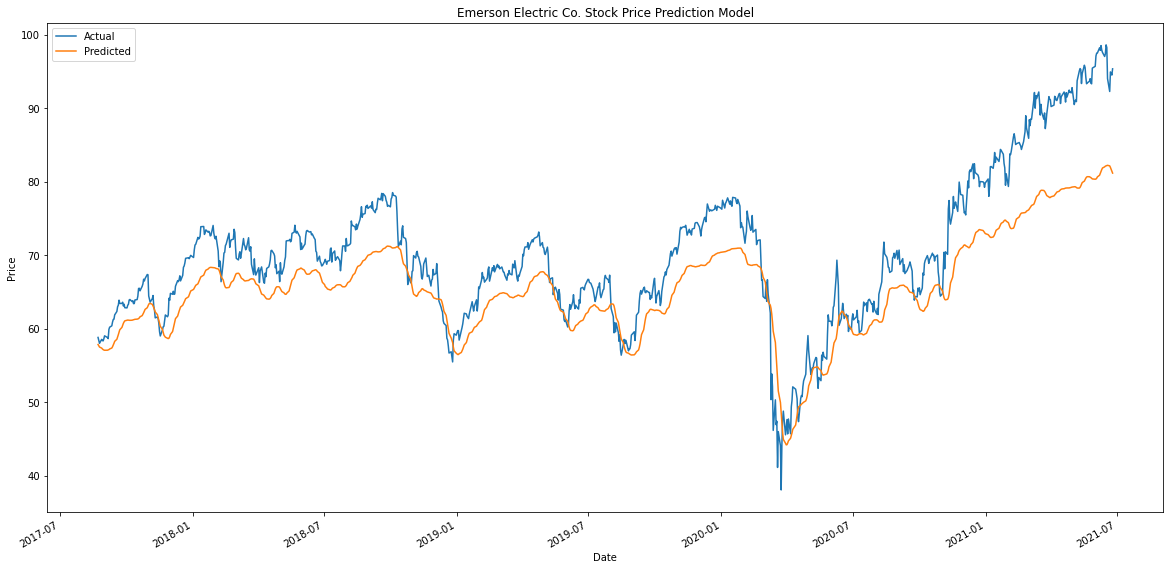

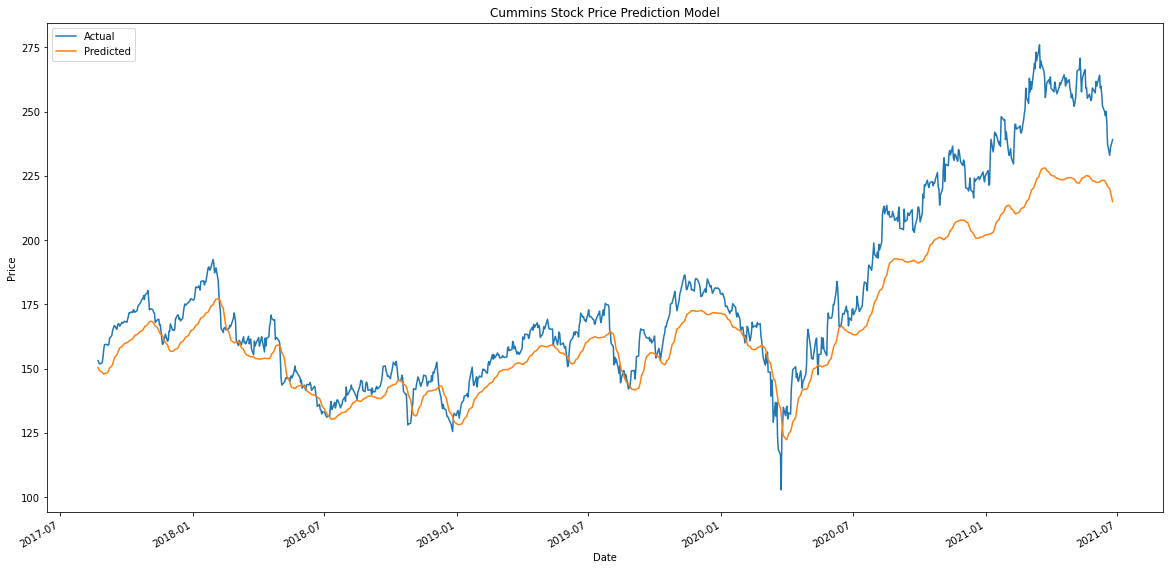

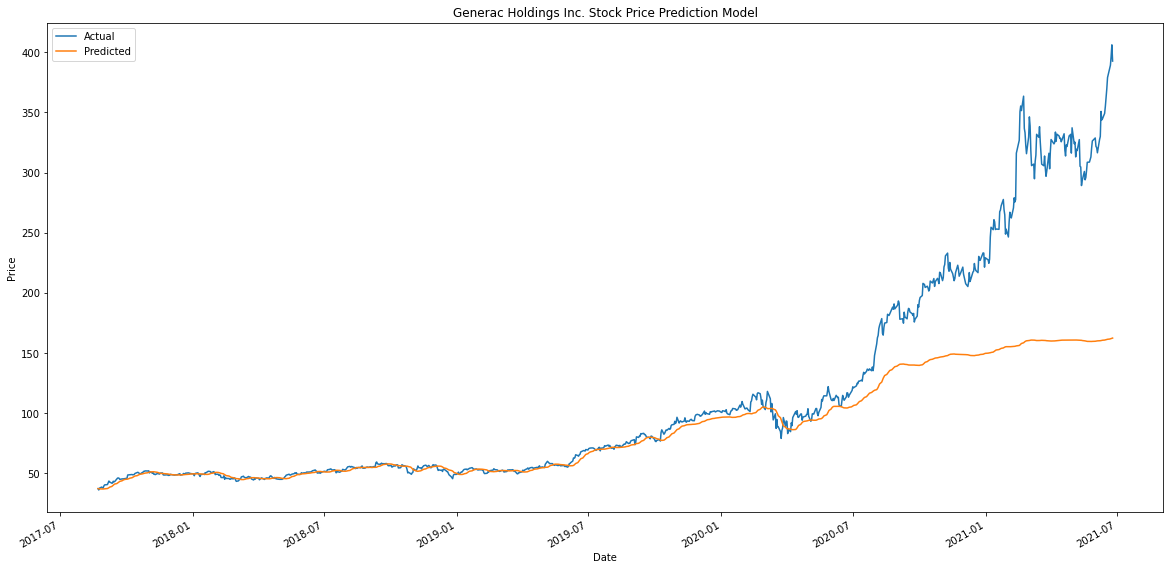

In [4]:
model_emr.summary()
stock_emr_actual_predicted.plot(figsize=(20,10), ylabel="Price", title=stock_emr_title)
stock_cmi_actual_predicted.plot(figsize=(20,10), ylabel="Price", title=stock_cmi_title)
stock_gnrc_actual_predicted.plot(figsize=(20,10), ylabel="Price", title=stock_gnrc_title)